# Gradient Descent - 1D Example
This demo will work through a very basic example of how to think about and compute loss landscapes and gradients. Each unique combination of parameter values is associated with an error and loss. The loss is a metric of how well our model's predictions match the actual outcomes in our training data. Depending on the type of model and algorithmic objective, or loss function is defined differently. In linear regression, it is computed from the error between predictions and actual outcomes, either for a single trainingdata point, across a subset of datapoints in our training data, or across all datapoints to our disposal. In linear regression, the error is simple the difference between prediction yi and actual outcome yi. Defined in this way, error can be both positive and negative. Loss is then defined as the sum of squared errors, divided by the number of data points used. The helper functions below implement these metrics. 

### Import

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

### Fonts

In [2]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Compute Error

In [3]:
def compute_error(y_pred,y):
    
    error = y_pred - y
    return error

### Compute Loss

In [4]:
def compute_loss(y_pred,y):
    
    error = compute_error(y_pred,y)
    loss = np.sum(error**2) / len(y_pred)
    return loss

### Prediction

In [18]:
def predict(X,theta):
    
    ypred = np.dot(X,theta)
    return y_pred

### Parameters

In [28]:
a = 2
no_points = 20

### Create Data
Our data is generated using a simple linear model: y = ax

In [29]:
x = np.linspace(-10,10,no_points)
y = a * x

### Compute the loss for a range of values for a. 
Since we created our data with a = 2, the loss is minimal (almost zero depending on the amount of noise we introduce) for this value. A larger or small a will yield a loss higher than that. Not only that, but because loss is the error between predicted and observed squared, the loss increases exponentially away from the optimal setting of a=2. 

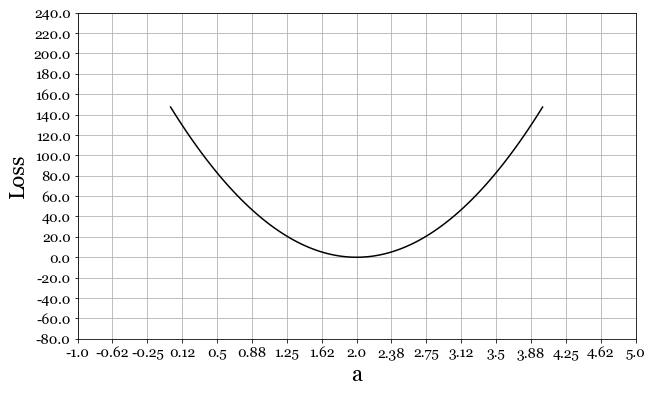

In [163]:
errors = []
losses = []
theta = np.linspace(0,4,101)
for i in range(len(theta)):
    y_pred = x * theta[i]
    error = compute_error(y_pred,y)
    loss = compute_loss(y_pred,y)
    errors.append(error)
    losses.append(loss)
losses = np.array(losses)
errors = np.array(errors)
    
plt.figure(figsize=(10,6))
plt.plot(theta,losses,'k')
plt.xticks(np.linspace(-1,5,17),labels=np.round(np.linspace(-1,5,17),2),fontsize=14,**csfont);
plt.yticks(np.linspace(-80,240,17),labels=np.round(np.linspace(-80,240,17),2),fontsize=14,**csfont);
plt.xlabel('a',fontsize=22,**csfont);
plt.ylabel('Loss',fontsize=22,**csfont);
plt.grid()
plt.savefig('../../assets/matplotlib/014_gradient_1d_1.png',dpi=300,bbox_inches="tight")

### Compute the gradient
Now, imagine that our current estimate for a is 3.5, we can compute the associated error and loss
Summing the error times the input across all inputs and normalizing it by the -0.5 times the number of inputs gives us the gradient. The gradient informs us on how to update a in order to descent downward towards a lower loss. And not to be overly ambitious, we move a fraction in that direction, with the fraction set by the learning rate. 

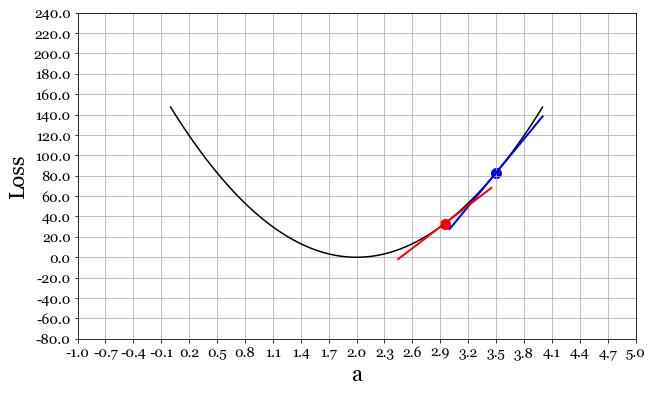

In [164]:
#Start with a = 3.5
a = 3.5
learning_rate = 0.005
y_pred = a * x
error = compute_error(y_pred,y)
loss = compute_loss(y_pred,y)
gradient = np.sum(error*x) / (0.5*len(x))

#Update a to a_new and recompute all metrics
a_new = a - gradient*learning_rate
y_pred_new = a_new * x
error_new = compute_error(y_pred_new,y)
loss_new = compute_loss(y_pred_new,y)
gradient_new = np.sum(error_new*x) / (0.5*len(x))

plt.figure(figsize=(10,6))
plt.plot(theta,losses,'k')
plt.scatter(a,loss,color=(0,0,1),s=100);
plt.plot([a-0.50,a+0.50],[loss-(0.5*gradient),loss+(0.5*gradient)],c=(0,0,1),linewidth=2);
plt.scatter(a_new,loss_new,color=(1,0,0),s=100);
plt.plot([a_new-0.50,a_new+0.50],[loss_new-(0.5*gradient_new),loss_new+(0.5*gradient_new)],c=(1,0,0),linewidth=2);
plt.xticks(np.linspace(-1,5,21),labels=np.round(np.linspace(-1,5,21),2),fontsize=14,**csfont);
plt.yticks(np.linspace(-80,240,17),labels=np.round(np.linspace(-80,240,17),2),fontsize=14,**csfont);
plt.xlabel('a',fontsize=22,**csfont);
plt.ylabel('Loss',fontsize=22,**csfont);
plt.grid()
plt.savefig('../../assets/matplotlib/014_gradient_1d_2.png',dpi=300,bbox_inches="tight");

### Animate the process with a small learning rate, simulating conventional gradient descent

In [172]:
a = 4
learning_rate = 0.025
plt.figure(figsize=(10,6))
for i in range(100):
    y_pred = a * x
    error = compute_error(y_pred,y)
    loss = compute_loss(y_pred,y)
    gradient = np.sum(error*x) / (0.5*len(x))
    
    plt.plot(theta,losses,'k')
    plt.xticks(np.linspace(-1,5,21),labels=np.round(np.linspace(-1,5,21),2),fontsize=14,**csfont);
    plt.yticks(np.linspace(-80,240,17),labels=np.round(np.linspace(-80,240,17),2),fontsize=14,**csfont);
    plt.xlabel('a',fontsize=22,**csfont);
    plt.ylabel('Loss',fontsize=22,**csfont);
    plt.grid()
    plt.scatter(a,loss,color=(1,0,0),s=100);
    plt.plot([a-0.50,a+0.50],[loss-(0.5*gradient),loss+(0.5*gradient)],c=(1,0,0),linewidth=2);
    plt.axis((-1,5,-100,240))
    plt.savefig('../../assets/matplotlib/014_gradient_1d_anim_' + str(i) + '.png',dpi=300,bbox_inches="tight");
    plt.clf()    

    #Update a
    a = a - gradient*learning_rate
    print(a)

0.3157894736842102
3.418282548476455
0.8056568012829852
3.0057626936564334
1.153041942184056
2.713227838160795
1.3993870836540676
2.505779297975522
1.5740805911785078
2.3586689758496777
1.6979629677055348
2.2543469745637603
1.7858130740515703
2.1803679376407827
1.848111210407762
2.127906349130306
1.8922893902060582
2.0907036714054246
1.9236179609217479
2.0643217171185277
1.9458343434791345
2.0456131844386234
1.9615888973148434
2.032346191734869
1.9727611016969526
2.022938019623619
1.9806837729485312
2.0162662964643947
1.9863020661352466
2.0115351022018975
1.990286229724718
2.0081800170739217
1.993111564569329
2.0058007877310913
1.9951151261211861
2.0041135780032118
1.9965359343130848
2.002917107946876
1.997543488044736
2.002068641646538
1.9982579859818626
2.0014669591731686
1.998764665959437
2.0010402812973163
1.9991239736443653
2.000737706404745
1.999378773553899
2.0005231380598745
1.9995594626864215
2.000370978790382
1.9996875968080994
2.000263076372127
1.9997784620024193
2.000186558

<Figure size 720x432 with 0 Axes>